[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rsarka34/NPTEL-Deep-Learning-Hands-on-NOC24EE04-/blob/main/Autoencoder/Autoencoder.ipynb)

In [1]:
import keras
from  keras.datasets import mnist
import numpy as np
(X_TRAIN,Y_TRAIN),(X_TEST,Y_TEST) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
X_TRAIN = np.reshape(X_TRAIN,(60000,784))
X_TEST = np.reshape(X_TEST,(10000,784))
X_TRAIN = X_TRAIN/255
X_TEST = X_TEST/255
print("Shape of Train Data: {}".format(X_TRAIN.shape))
print("Shape of TEST Data: {}".format(X_TEST.shape))

Shape of Train Data: (60000, 784)
Shape of TEST Data: (10000, 784)


### **Shallow Autoencoder (784-100-784)**

In [3]:
encoding_dim = 100
from keras.models import Model
from keras.layers import Input, Dense

input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 784)               79184     
                                                                 
Total params: 157684 (615.95 KB)
Trainable params: 157684 (615.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# Define the encoder model
encoder = Model(input_img, encoded)

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(X_TRAIN,X_TRAIN,epochs=20,batch_size=128,shuffle=True,
                validation_data=(X_TEST,X_TEST))

Epoch 1/20
469/469 [==============================] - 8s 7ms/step - loss: 0.1802 - val_loss: 0.1170
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1027 - val_loss: 0.0903
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0854 - val_loss: 0.0798
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0780 - val_loss: 0.0750
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0743 - val_loss: 0.0725
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0723 - val_loss: 0.0710
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0710 - val_loss: 0.0700
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0702 - val_loss: 0.0694
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0696 - val_loss: 0.0689
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0692 - val_loss: 0.0685

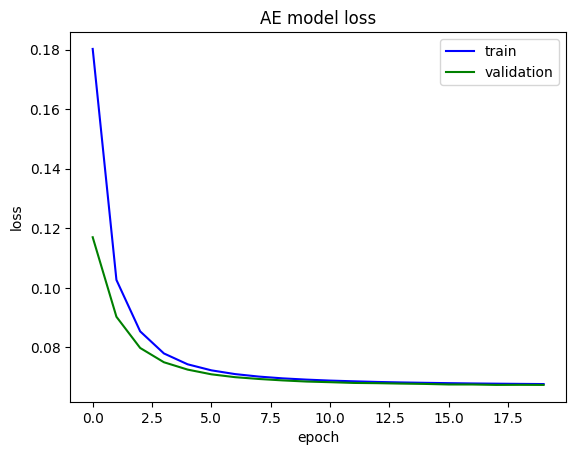

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'],'g-')
plt.title('AE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')


In [7]:
predicted_imgs = autoencoder.predict(X_TEST)

313/313 [==============================] - 1s 1ms/step


TEST DATA AS INPUT:


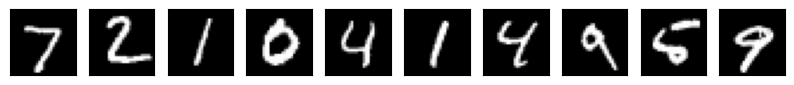

Reconstructed Image:


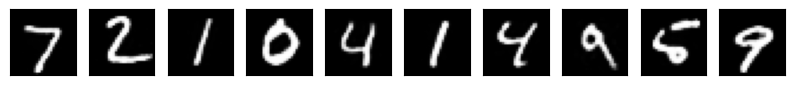

In [8]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
print("TEST DATA AS INPUT:")
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_TEST[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print("Reconstructed Image:")

plt.figure(figsize=(10, 4))
for i in range(n):
    # display original

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(predicted_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
# Get the latent space representation of your data
latent_representation = encoder.predict(X_TEST)

313/313 [==============================] - 0s 1ms/step


In [10]:
latent_representation.shape

(10000, 100)

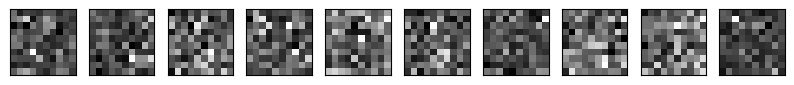

In [11]:
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(latent_representation[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **Deep Auto-encoder**

In [12]:
encoding_dim = 32
from keras.models import Model
from keras.layers import Input, Dense
input_img = Input(shape=(784,))


encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [ ]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 784)               1011

In [13]:
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_TRAIN,X_TRAIN,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(X_TEST,X_TEST))

Epoch 1/50
469/469 [==============================] - 6s 6ms/step - loss: 0.0476 - val_loss: 0.0260
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0224 - val_loss: 0.0193
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0181 - val_loss: 0.0165
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0158 - val_loss: 0.0147
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0144 - val_loss: 0.0134
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0133 - val_loss: 0.0127
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0126 - val_loss: 0.0121
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0121 - val_loss: 0.0116
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0116 - val_loss: 0.0111
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0112 - val_loss: 0.0108

313/313 [==============================] - 1s 2ms/step
TEST DATA AS INPUT:


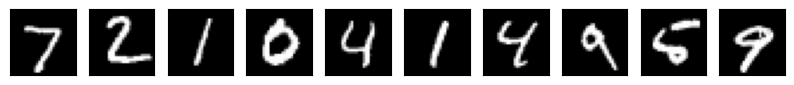

Reconstructed Image:


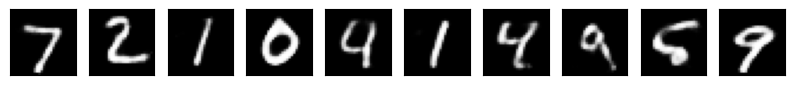

In [14]:
import matplotlib.pyplot as plt
encoded_imgs = autoencoder.predict(X_TEST)
n = 10  # how many digits we will display
print("TEST DATA AS INPUT:")
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_TEST[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print("Reconstructed Image:")

plt.figure(figsize=(10, 4))
for i in range(n):
    # display original

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **Denoising convolutional AE**

In [15]:
import numpy as np
x_train = np.reshape(X_TRAIN, (len(X_TRAIN), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(X_TEST, (len(X_TEST), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(0.0, 1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(0.0, 1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

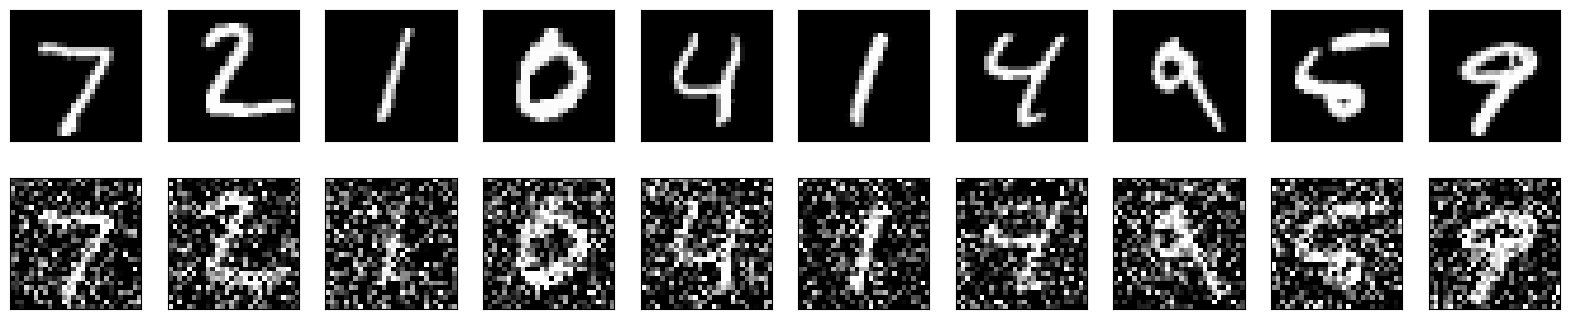

In [16]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_TEST[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

In [18]:
input_img = Input(shape=(28, 28, 1))
# encoding part
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x) # latent representation of AE

# decoder part
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [19]:
autoencoder = Model(input_img, decoded)

autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248

In [20]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
#Let's train it for 100 epochs:

autoencoder.fit(x_train_noisy,x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy,x_test))

Epoch 1/100
469/469 [==============================] - 7s 8ms/step - loss: 0.1682 - val_loss: 0.1184
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1148 - val_loss: 0.1100
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1089 - val_loss: 0.1060
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1055 - val_loss: 0.1034
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1036 - val_loss: 0.1016
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1022 - val_loss: 0.1007
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1009 - val_loss: 0.1000
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1000 - val_loss: 0.0988
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0993 - val_loss: 0.0985
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0988 - val_lo

313/313 [==============================] - 1s 2ms/step


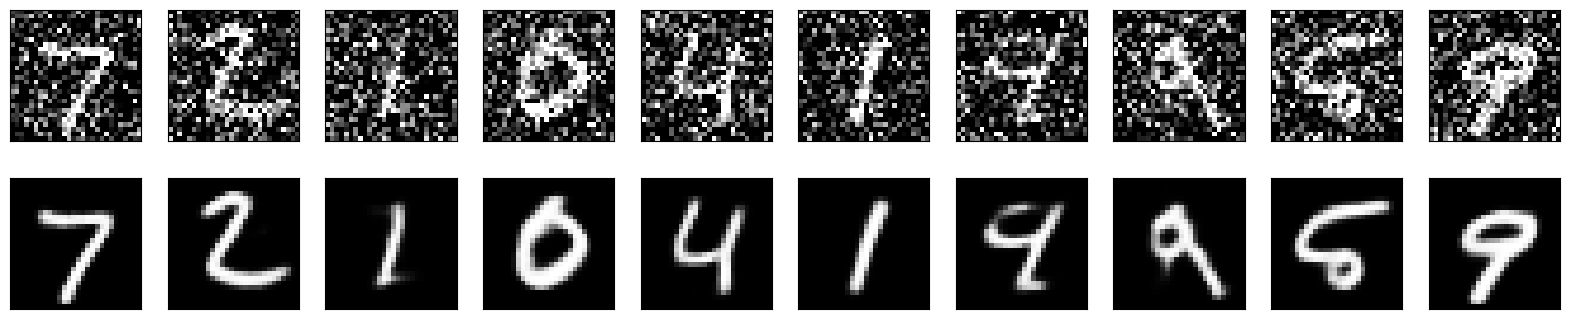

In [21]:
import matplotlib.pyplot as plt

encoded_imgs = autoencoder.predict(x_test_noisy)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **PCA**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from keras.datasets import mnist

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Reshape and normalize the data
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0

In [23]:
# Apply PCA
pca = PCA(n_components=10)  # You can adjust the number of components here
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
# Dimensionality reduction
print("Original data shape:", x_train.shape)
print("Data shape after PCA:", x_train_pca.shape)

Original data shape: (60000, 784)
Data shape after PCA: (60000, 10)


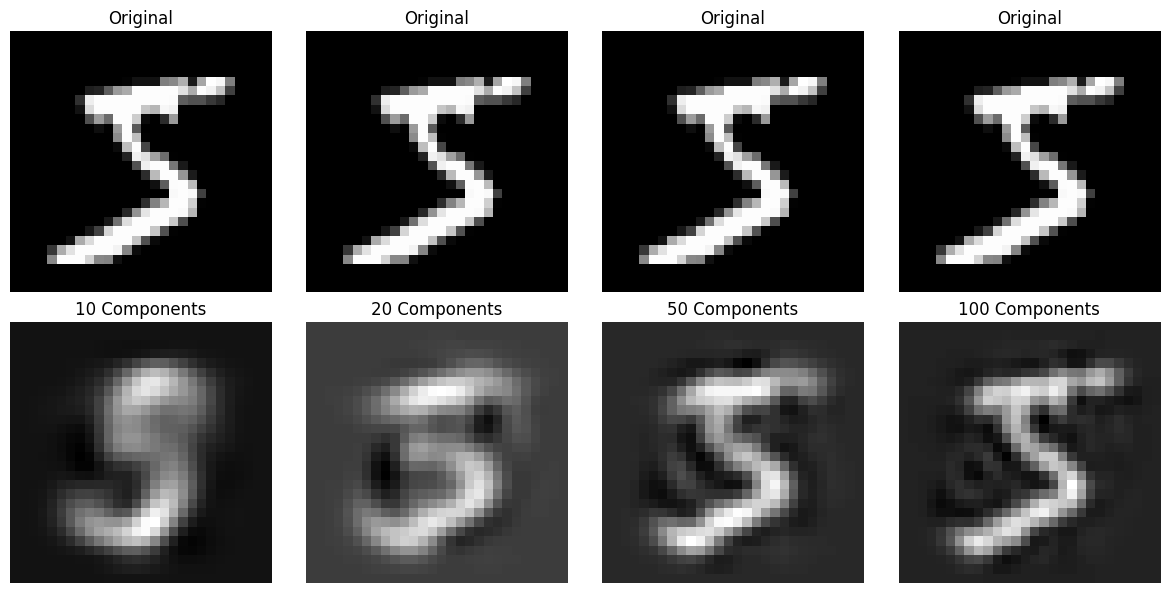

In [24]:
# Reconstruction using different number of principal components
n_components_list = [10, 20, 50, 100]

plt.figure(figsize=(12, 6))
for i, n_components in enumerate(n_components_list):
    pca = PCA(n_components=n_components)
    x_train_reconstructed = pca.inverse_transform(pca.fit_transform(x_train))

    plt.subplot(2, len(n_components_list), i + 1)
    plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(2, len(n_components_list), len(n_components_list) + i + 1)
    plt.imshow(x_train_reconstructed[0].reshape(28, 28), cmap='gray')
    plt.title(f"{n_components} Components")
    plt.axis('off')

plt.tight_layout()
plt.show()


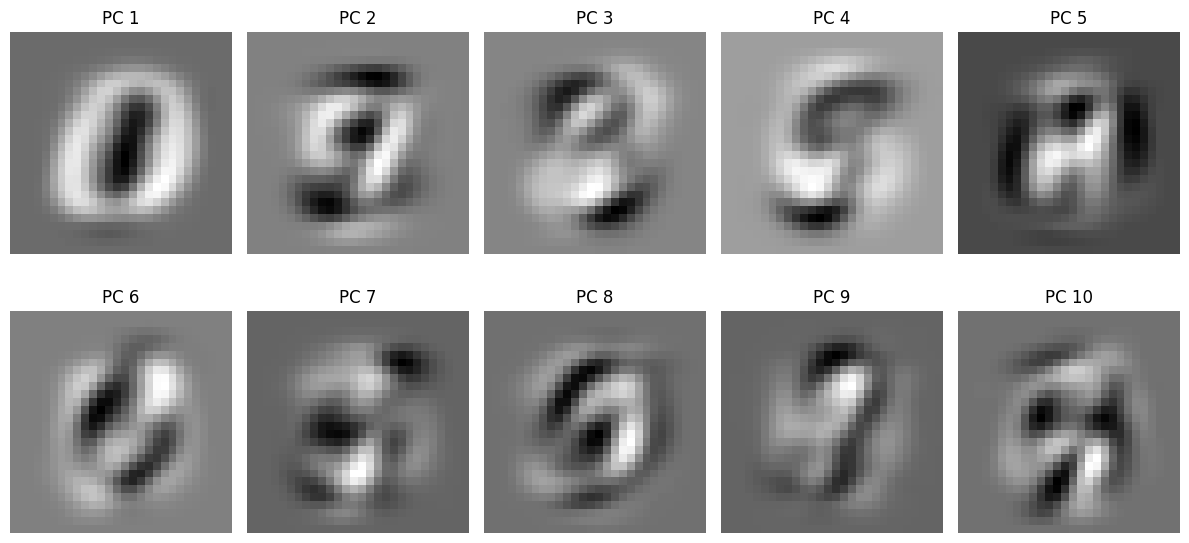

In [25]:
# Visualize the principal components
plt.figure(figsize=(12, 6))
for i in range(10):  # 10 components to match the subplots
    plt.subplot(2, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    plt.title(f"PC {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**PCA for 128 components**

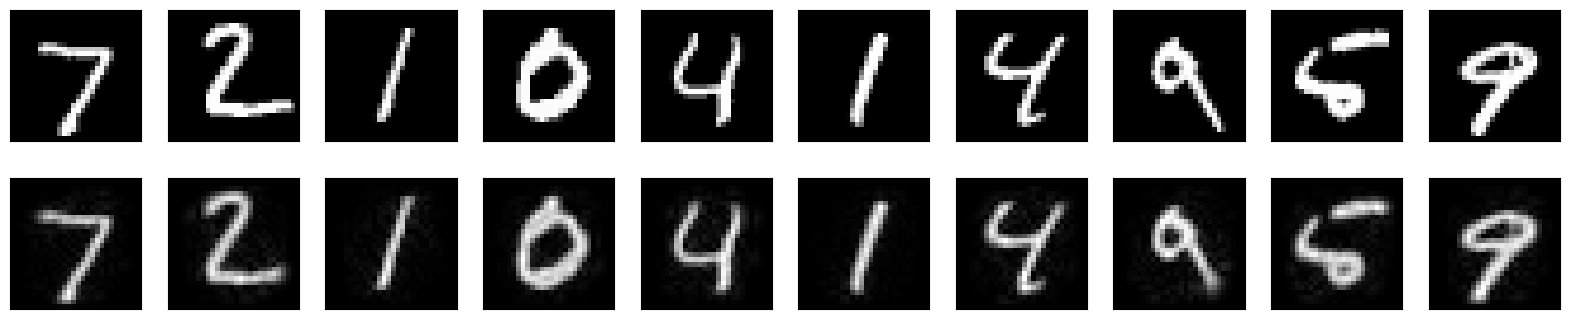

In [26]:
pca = PCA(128)
pca.fit(X_TRAIN)
TRAIN= pca.transform(X_TRAIN)
TEST = pca.transform(X_TEST)
approximation_TRAIN = pca.inverse_transform(TRAIN)
approximation_TEST = pca.inverse_transform(TEST)

import matplotlib.pyplot as plt

#encoded_imgs = autoencoder.predict(X_TEST)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_TEST[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(np.abs(approximation_TEST[i]).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()